<a href="https://colab.research.google.com/github/Naveen148/Naveen148/blob/main/project_chennai_house_sale_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train-chennai-sale.csv")

In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

# **Check for any null elements are present ** 

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# ***#**Any unique elements are never taken as a feature so we are deleting prt_id**t***

In [ ]:
del df['PRT_ID']

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# **In a same way commoision also cannot be considered as a one of the feature before sale,so we are deleting commision column**

In [ ]:
del df['COMMIS']

**bold text**

# **In a same way reg fee also cannot be considered as a one of the feature before sale,so we are deleting  column**

In [ ]:
del df['REG_FEE']

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


# **Non feature elements are deleted and data is ready with feature and target varible**

# **Check for duplicates and drop duplicates if any**

In [ ]:
df.drop_duplicates()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000
7105,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,10818480
7106,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,8351410
7107,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000


In [ ]:
df.shape

(7109, 19)

# **There is no duplicates as we can see none of the rows delete on drop duplicates**

# **we need to clear the problem of null elements either by drop,bfill or ffill**

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

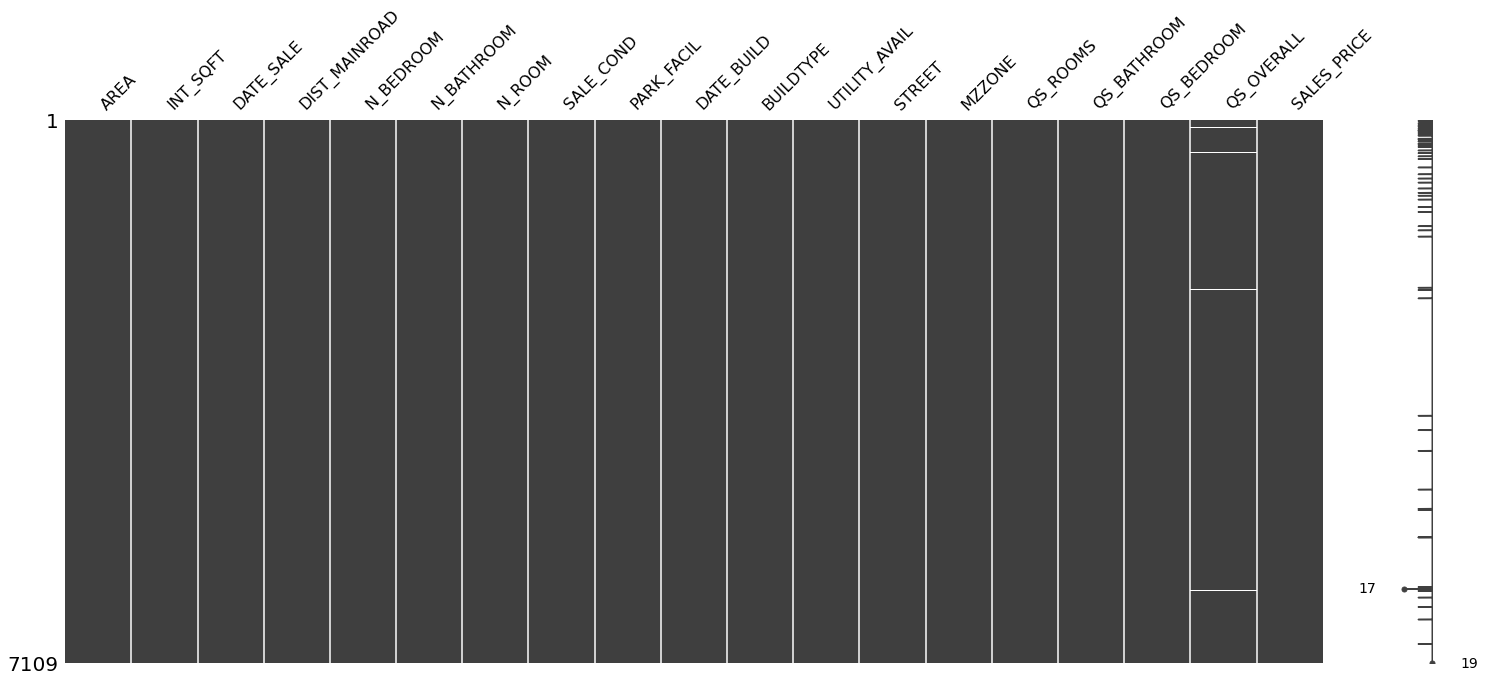

In [ ]:
import missingno as msno
msno.matrix(df)
plt.show()

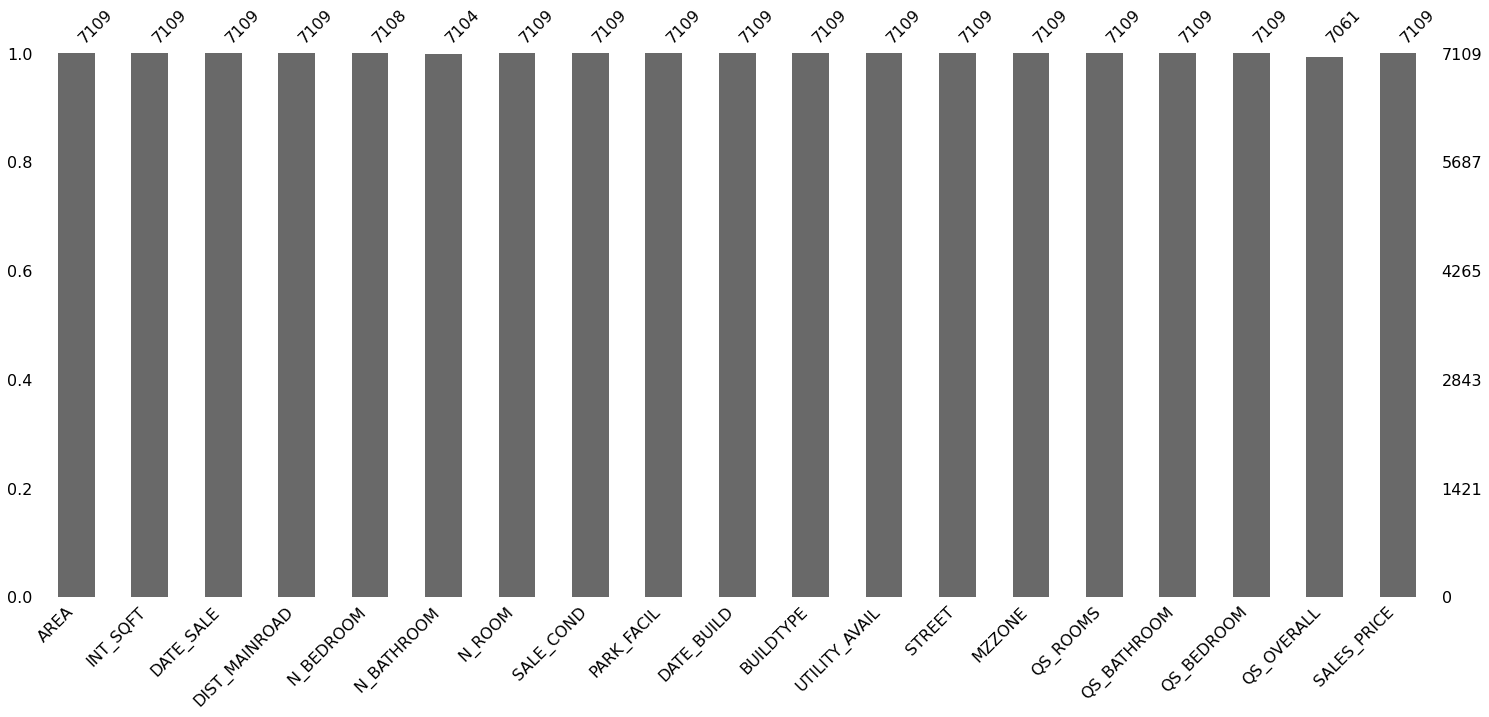

In [ ]:
msno.bar(df)

# **we can see QS overall contains 48 null values **

# **same way no of bedroom and bathroom has null values we putting dummies**

In [ ]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [ ]:
df = df.dropna(subset = ['QS_OVERALL'] )

In [ ]:
df = df.dropna(subset = ['N_BEDROOM'] )

In [ ]:
df = df.dropna(subset = ['N_BATHROOM'])

In [ ]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

# **now we can see that no null values are present in data set**

# **Check for datatypes**

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

# **we can find age of house and deleted build and sale date columns**

In [ ]:
df.DATE_BUILD = pd.DatetimeIndex(df.DATE_BUILD).year
df.DATE_SALE = pd.DatetimeIndex(df.DATE_SALE).year
df['AGE_BUILDING']= (df.DATE_SALE - df.DATE_BUILD)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010,14,3.0,2.0,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


# **Firtsly we need to convert date time to date time types,it is showing object type that is consider itself as tring**

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE          int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD         int64
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
AGE_BUILDING       int64
dtype: object

In [ ]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010,14,3.0,2.0,5,Family,No,1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


# **we found age now we deleting build and sale date**

In [ ]:
del df['DATE_SALE']

In [ ]:
del df['DATE_BUILD']

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [ ]:
df.shape

(7056, 18)

how many areas were present can check through unique values

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

# **Same way we are checking for all unique values for EDA  exploratory data analysis**

In [ ]:
df.N_BEDROOM.unique()

array([1., 2., 3., 4.])

In [ ]:
df.N_BATHROOM.unique()

array([1., 2.])

In [ ]:
df.N_ROOM.unique()

array([3, 5, 4, 2, 6])

In [ ]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

# **From above we can clearly see that same name is taken in different way  for example paved and pavd is same but pandas detect it as different like this there are lot of errors**

In [ ]:
df['AREA'].value_counts()

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [ ]:
mappings = {'Chrompt':'Chrompet', 'Chrmpet':'Chrompet', 'Chormpet':'Chrompet','Karapakam':'Karapakkam','KKNagar':'KK Nagar',
           'Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Adyr':'Adyar','TNagar':'T Nagar'}

In [ ]:
df['AREA'] = df['AREA'].replace(mappings)
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].value_counts()

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64

In [ ]:
mappings = {'AdjLand': 'Adj Land', 
            'Adj Land':'Adj Land',
            'Normal Sale': 'Normal Sale',
            'Partial': 'Partial',
            'Partiall': 'Partial',
            'PartiaLl': 'Partial',
            'AbNormal':'AbNormal',
            'Ab Normal':'AbNormal',
            'Family':'Family'}

In [ ]:
df['SALE_COND'] = df['SALE_COND'].replace(mappings)
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df['BUILDTYPE'].value_counts()

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64

In [ ]:
mappings={'Commercial':'Comercial',
          'Others':'Other',
         } 

In [ ]:
df['BUILDTYPE'] = df['BUILDTYPE'].replace(mappings)
df['BUILDTYPE'].unique()

array(['Comercial', 'Other', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [ ]:
mappings={'AllPub':'All Pub',
          'NoSeWa':'NoSewr',
          'NoSewr ':'NoSewr'
         } 

In [ ]:
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace(mappings)
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
df['STREET'].value_counts()

Paved        2542
Gravel       2502
No Access    1993
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [ ]:
mappings={'Pavd':'Paved',
          'No Access':'NoAccess'}

In [ ]:
df['STREET'] = df['STREET'].replace(mappings)
df['STREET'].unique()

array(['Paved', 'Gravel', 'NoAccess'], dtype=object)

In [ ]:
df.groupby('STREET').median()['SALES_PRICE']

STREET
Gravel      10838880.0
NoAccess     9405400.0
Paved       10470070.0
Name: SALES_PRICE, dtype: float64

In [ ]:
df.groupby('UTILITY_AVAIL').median()['SALES_PRICE']

UTILITY_AVAIL
All Pub    10686720.0
ELO         9641790.0
NoSewr     10416015.0
Name: SALES_PRICE, dtype: float64

In [ ]:
df.groupby('BUILDTYPE').median()['SALES_PRICE']

BUILDTYPE
Comercial    13355600.0
House         8983700.0
Other         9631875.0
Name: SALES_PRICE, dtype: float64

In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Comercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Comercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Comercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.088801e+07,24.273526
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.769081e+06,12.331565
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.266790e+06,14.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.031922e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298148e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


# **we can see that there are no outliers,we can see the same in box plot**

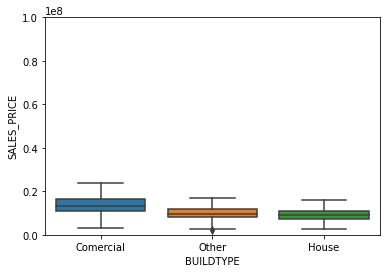

In [ ]:
sns.boxplot(x = 'BUILDTYPE', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('BUILDTYPE')
plt.ylabel('SALES_PRICE')
plt.show()

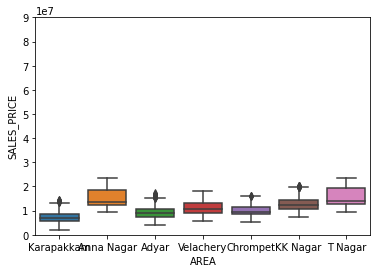

In [ ]:
sns.boxplot(x = 'AREA', y = 'SALES_PRICE', data = df)
plt.ylim(0, 90000000)
plt.xlabel('AREA')
plt.ylabel('SALES_PRICE')
plt.show()

In [ ]:
df.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
AGE_BUILDING       int64
dtype: object

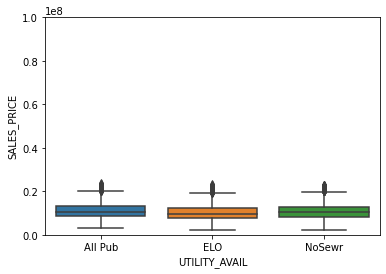

In [ ]:
sns.boxplot(x = 'UTILITY_AVAIL', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('UTILITY_AVAIL')
plt.ylabel('SALES_PRICE')
plt.show()

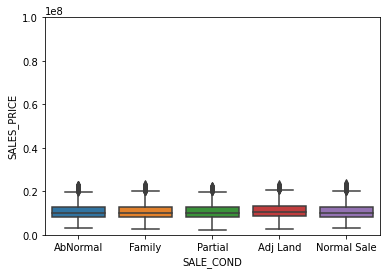

In [ ]:
sns.boxplot(x = 'SALE_COND', y = 'SALES_PRICE', data = df)
plt.ylim(0, 100000000)
plt.xlabel('SALE_COND')
plt.ylabel('SALES_PRICE')
plt.show()

In [ ]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,1.088801e+07,24.273526
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,3.769081e+06,12.331565
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.266790e+06,14.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.031922e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,1.298148e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


In [ ]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Comercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Comercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Comercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Other,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


# **Age columns contains numerical value with days ,,,so we need to delete days associated with no of days**

In [ ]:

df['AGE_BUILDING'].dtypes

dtype('int64')

# **Expolratory data analysis**

# **Encoding of data   'Area'  'SALE_COND'  'PARK_FACIL' 'BUILDTYPE''UTILITY_AVAIL''STREET' 'MZZONE' **

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

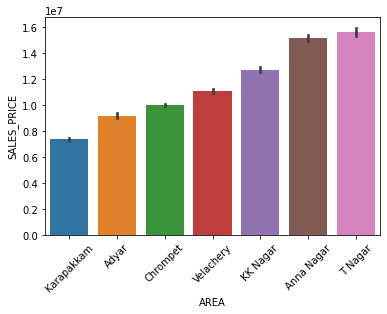

In [ ]:
a=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=a)
plt.xticks(rotation=45)

# **we can clearly see linear relation between area and salesprice thus we use label encode for area

(array([   0,    1,    2, ..., 1695, 1696, 1697]),
 <a list of 1698 Text major ticklabel objects>)

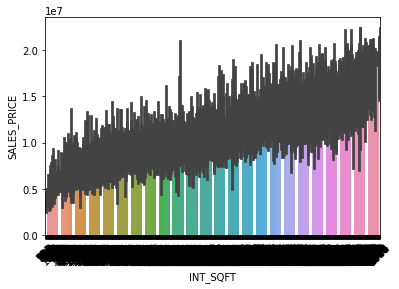

In [ ]:
b=df.groupby('INT_SQFT')['SALES_PRICE'].median().reset_index().sort_values('SALES_PRICE')['INT_SQFT']
sns.barplot(x='INT_SQFT',y='SALES_PRICE',data=df,order=b)
plt.xticks(rotation=45)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

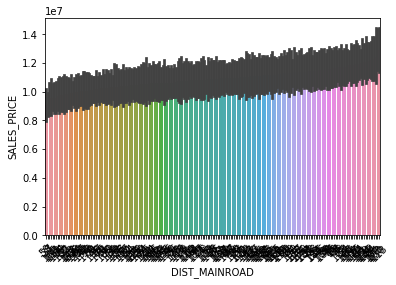

In [ ]:
c=df.groupby('DIST_MAINROAD')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['DIST_MAINROAD']
sns.barplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,order=c)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

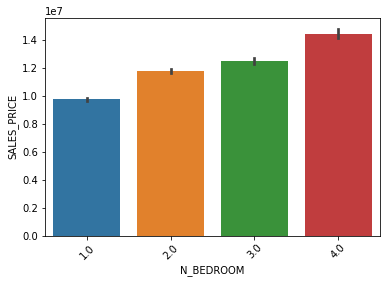

In [ ]:
d=df.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df,order=d)
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

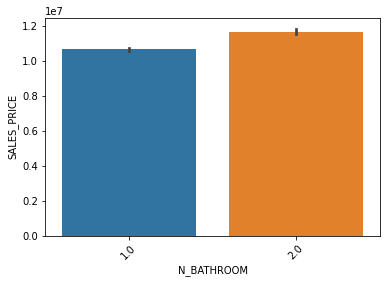

In [ ]:
e=df.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df,order=e)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

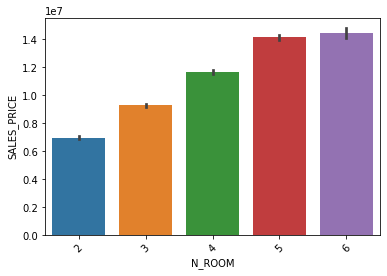

In [ ]:
f=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df,order=f)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

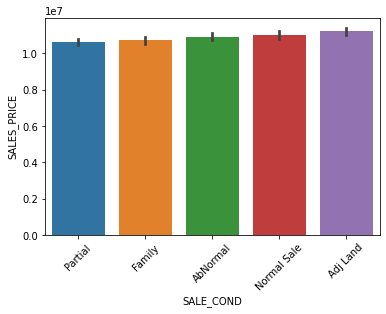

In [ ]:
g=df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order=g)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

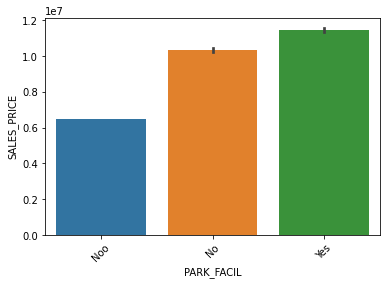

In [ ]:
h=df.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df,order=h)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

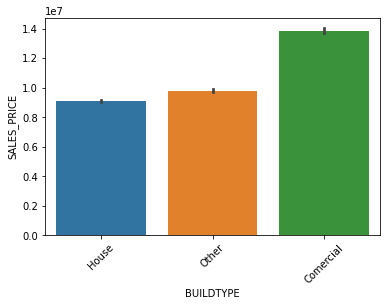

In [ ]:
i=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=i)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

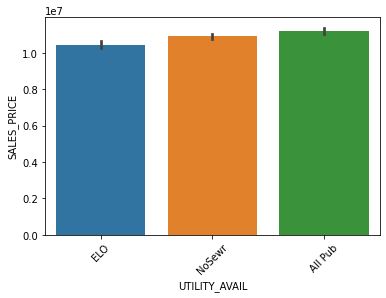

In [ ]:
j=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=j)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

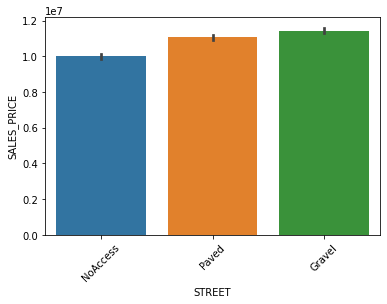

In [ ]:
k=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=k)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

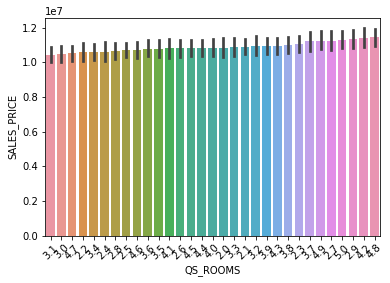

In [ ]:
l=df.groupby('QS_ROOMS')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['QS_ROOMS']
sns.barplot(x='QS_ROOMS',y='SALES_PRICE',data=df,order=l)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

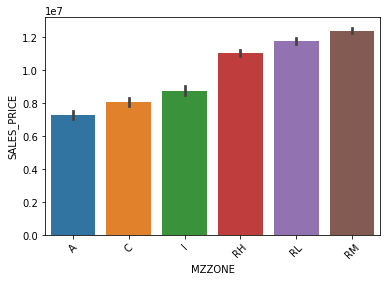

In [ ]:
m=df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order=m)
plt.xticks(rotation=45)

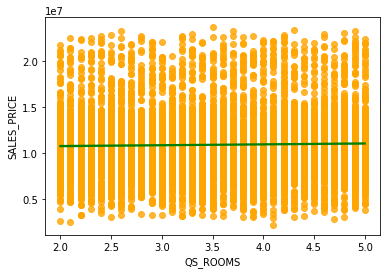

In [ ]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

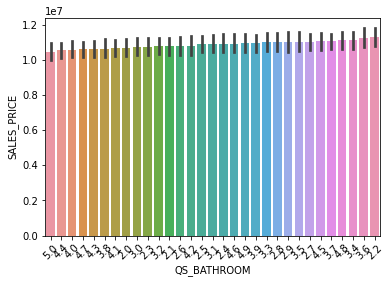

In [ ]:
b=df.groupby('QS_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['QS_BATHROOM']
sns.barplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,order=b)
plt.xticks(rotation=45)

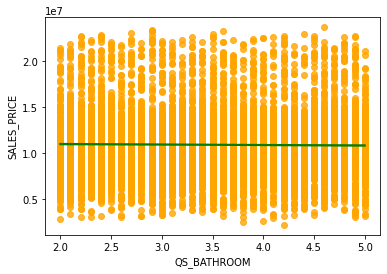

In [ ]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

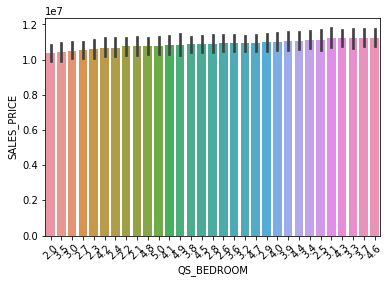

In [ ]:
b=df.groupby('QS_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['QS_BEDROOM']
sns.barplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,order=b)
plt.xticks(rotation=45)

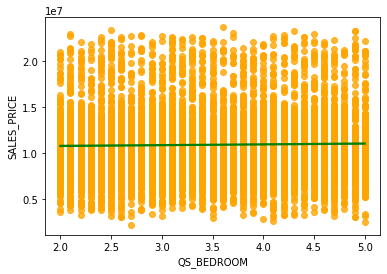

In [ ]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

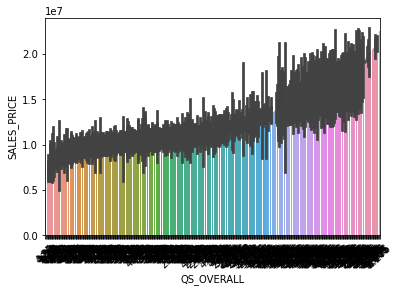

In [ ]:
b=df.groupby('QS_OVERALL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['QS_OVERALL']
sns.barplot(x='QS_OVERALL',y='SALES_PRICE',data=df,order=b)
plt.xticks(rotation=45)

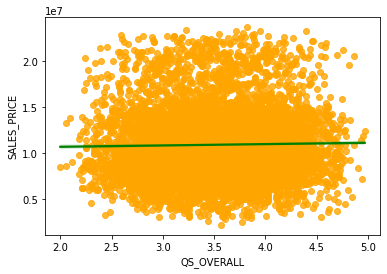

In [ ]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]), <a list of 53 Text major ticklabel objects>)

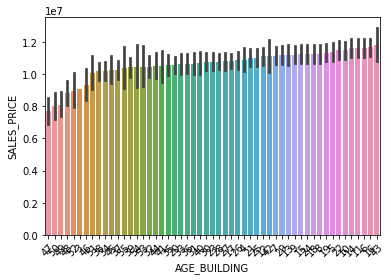

In [ ]:
b=df.groupby('AGE_BUILDING')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AGE_BUILDING']
sns.barplot(x='AGE_BUILDING',y='SALES_PRICE',data=df,order=b)
plt.xticks(rotation=45)

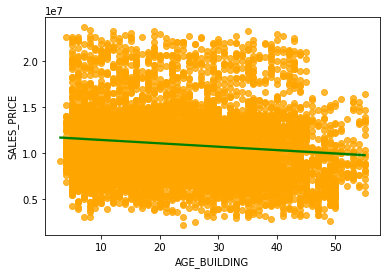

In [ ]:
sns.regplot(x='AGE_BUILDING',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

# **park facility is a binary type thus label encoding**

In [ ]:
# Import label encoder
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['PARK_FACIL']= label_encoder.fit_transform(df['PARK_FACIL'])

df['PARK_FACIL'].unique()


array([2, 0, 1])

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['UTILITY_AVAIL']= label_encoder.fit_transform(df['UTILITY_AVAIL'])

df['UTILITY_AVAIL'].unique()

array([0, 1, 2])

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['STREET']= label_encoder.fit_transform(df['STREET'])

df['STREET'].unique()

array([2, 0, 1])

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['AREA']= label_encoder.fit_transform(df['AREA'])

df['AREA'].unique()

array([4, 1, 0, 6, 2, 3, 5])

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [ ]:
mappings = {'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6}


In [ ]:
df['MZZONE'] = df['MZZONE'].replace(mappings)
df['MZZONE'].unique()

array([0, 4, 5, 2, 1, 6])

In [ ]:
from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


df['SALE_COND']= label_encoder.fit_transform(df['SALE_COND'])

df['SALE_COND'].unique()

array([0, 2, 4, 1, 3])

In [ ]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING,BUILDTYPE_House,BUILDTYPE_Other
0,4,1004,131,1.0,1.0,3,0,2,0,2,0,4.0,3.9,4.9,4.330,7600000,44,0,0
1,1,1986,26,2.0,1.0,5,0,0,0,0,4,4.9,4.2,2.5,3.765,21717770,11,0,0
2,0,909,70,1.0,1.0,3,0,2,1,0,5,4.1,3.8,2.2,3.090,13159200,20,0,0
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,4.7,3.9,3.6,4.010,9630290,22,0,1
4,4,1226,84,1.0,1.0,3,0,2,0,0,1,3.0,2.5,4.1,3.290,7406250,30,0,1


In [ ]:
df.corr()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE_BUILDING,BUILDTYPE_House,BUILDTYPE_Other
AREA,1.000000,0.352190,-0.015040,0.362623,0.222661,0.280473,-0.007817,0.009359,0.003796,0.015130,-0.165870,0.004243,0.000038,0.003185,0.005543,-0.018286,0.182055,-0.012031,-0.001957
INT_SQFT,0.352190,1.000000,0.002267,0.786721,0.517103,0.951305,0.006140,0.004893,0.014684,0.008811,0.150446,0.020495,-0.007249,0.009643,0.013830,0.612668,-0.013608,-0.007196,-0.003273
DIST_MAINROAD,-0.015040,0.002267,1.000000,-0.001938,0.002496,0.002313,0.004424,-0.009654,0.002268,0.010385,0.006741,0.002739,-0.030999,0.001141,-0.017482,0.018062,-0.003065,-0.018710,-0.003098
N_BEDROOM,0.362623,0.786721,-0.001938,1.000000,0.756016,0.840654,0.009452,-0.009624,0.017857,0.003937,0.051213,0.015508,-0.006461,0.015810,0.013932,0.332595,-0.045636,0.004490,-0.005587
N_BATHROOM,0.222661,0.517103,0.002496,0.756016,1.000000,0.570110,0.002591,-0.014043,0.018322,-0.009846,-0.051953,0.013487,-0.011091,0.012278,0.007858,0.110984,-0.019123,0.017766,-0.012392
N_ROOM,0.280473,0.951305,0.002313,0.840654,0.570110,1.000000,0.009333,-0.000905,0.015722,0.000377,0.171537,0.016710,-0.006636,0.015618,0.015234,0.603417,-0.034339,-0.005443,-0.005191
SALE_COND,-0.007817,0.006140,0.004424,0.009452,0.002591,0.009333,1.000000,-0.012939,0.003176,0.011703,0.024645,0.004720,-0.013527,-0.005238,-0.007779,-0.030214,-0.011224,0.006847,-0.012432
PARK_FACIL,0.009359,0.004893,-0.009654,-0.009624,-0.014043,-0.000905,-0.012939,1.000000,0.003667,0.008969,-0.005883,-0.008471,-0.011551,-0.000725,-0.009822,0.146820,-0.009071,-0.009049,-0.001610
UTILITY_AVAIL,0.003796,0.014684,0.002268,0.017857,0.018322,0.015722,0.003176,0.003667,1.000000,0.008035,0.011593,0.006946,0.006285,0.007595,0.010753,-0.023722,-0.000630,0.005046,0.011799
STREET,0.015130,0.008811,0.010385,0.003937,-0.009846,0.000377,0.011703,0.008969,0.008035,1.000000,0.001192,0.011262,0.012068,-0.018001,0.005769,-0.042468,0.003487,-0.030622,0.007477


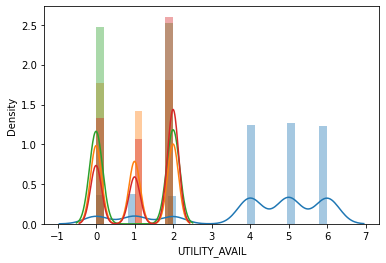

In [ ]:

sns.distplot(df["MZZONE"])
sns.distplot(df['STREET'])
sns.distplot(df["PARK_FACIL"])
sns.distplot(df['UTILITY_AVAIL'])

In [ ]:
del df['DIST_MAINROAD']

In [ ]:
del df['QS_ROOMS']

In [ ]:
del df['QS_OVERALL']

In [ ]:
del df['QS_BATHROOM']

In [ ]:
del df['QS_BEDROOM']

In [ ]:
del df['SALE_COND']

In [ ]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE_BUILDING,BUILDTYPE_House,BUILDTYPE_Other
0,4,1004,1.0,1.0,3,2,0,2,0,7600000,44,0,0
1,1,1986,2.0,1.0,5,0,0,0,4,21717770,11,0,0
2,0,909,1.0,1.0,3,2,1,0,5,13159200,20,0,0
3,6,1855,3.0,2.0,5,0,2,2,2,9630290,22,0,1
4,4,1226,1.0,1.0,3,2,0,0,1,7406250,30,0,1


In [ ]:
X = df.drop('SALES_PRICE',axis=1).values
y = df.SALES_PRICE.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
X_train

array([[-1.06586192,  0.8748607 , -0.78960957, ..., -0.34529943,
        -0.72797934,  1.43437145],
       [ 0.56000961, -0.72896901, -0.78960957, ..., -0.58796783,
        -0.72797934,  1.43437145],
       [ 1.64392396,  0.32497623,  0.45177105, ...,  1.19160048,
        -0.72797934, -0.69716948],
       ...,
       [ 0.56000961,  0.26387796,  0.45177105, ...,  0.54448473,
         1.37366536, -0.69716948],
       [-1.06586192,  1.22181162,  0.45177105, ..., -1.23508358,
         1.37366536, -0.69716948],
       [ 1.10196679,  0.5846439 , -0.78960957, ..., -0.34529943,
         1.37366536, -0.69716948]])

# **Linear regression model**

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)

10892671.567150956


In [ ]:
print(regressor.coef_)

[ -515291.68286874  1884637.61240978 -1122333.21959582  -453047.31961031
  1632367.64709968   510499.39259989   -96987.13073888  -229066.41183102
   986500.28970943  -184781.14014045 -2236864.75719927 -1869893.85417133]


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([11491499.86111585, 13401043.49377229,  8600558.33301716, ...,
        4704531.66325358, 11769778.21823877, 12195919.78109801])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,7910000,1.149150e+07
1,13308950,1.340104e+07
2,8460450,8.600558e+06
3,9478500,1.121581e+07
4,8558785,1.011459e+07
...,...,...
1407,9038260,9.090788e+06
1408,10802190,1.025876e+07
1409,4204000,4.704532e+06
1410,12078690,1.176978e+07


In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8981540513552189


In [ ]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1395356390798.6208


In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

0.9037170785720843

# **Random forest model**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 17, max_features='sqrt')
rf.fit(X_train, y_train);

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
r2_score(predictions, y_test)

0.9781390089566068

# **XG BOOST **

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.4919712822104587  Cross-Val score :  -0.4982845370917519
Learning rate :  0.02  Train score :  0.6675303578629357  Cross-Val score :  0.6631756589827622
Learning rate :  0.03  Train score :  0.8747874398128894  Cross-Val score :  0.8708308741617159
Learning rate :  0.04  Train score :  0.9268766191404265  Cross-Val score :  0.9226783965934902
Learning rate :  0.05  Train score :  0.9488423886385592  Cross-Val score :  0.944913200987704
Learning rate :  0.06  Train score :  0.9607628126952176  Cross-Val score :  0.9583572308743982
Learning rate :  0.07  Train score :  0.9700211771641422  Cross-Val score :  0.9668943546344743
Learning rate :  0.08  Train score :  0.9751179143782468  Cross-Val score :  0.9721716886573567
Learning rate :  0.09  Train score :  0.9785285760937242  Cross-Val score :  0.9755933741272372
Learning rate :  0.1  Train score :  0.9809440353648528  Cross-Val score :  0.9781575002042837
Learning rate :  0.11  Train score :  0.

In [ ]:
model = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test) # scoring the model - r2 squared

[03:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9885307266194395